<a href="https://colab.research.google.com/github/ingridcos/exercicios-praticos/blob/main/Projeto_Storytelling_PARTE_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dados = {
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'],
    'Tempo_medio_min': [45, 39, 33, 29, 50],
    'Satisfacao_clientes': [6.8, 7.4, 8.1, 8.3, 6.2],
    'Entregas_mes': [1200, 950, 800, 700, 1000]
}

df = pd.DataFrame(dados)

print(df)

           Cidade  Tempo_medio_min  Satisfacao_clientes  Entregas_mes
0       São Paulo               45                  6.8          1200
1  Rio de Janeiro               39                  7.4           950
2  Belo Horizonte               33                  8.1           800
3        Curitiba               29                  8.3           700
4        Salvador               50                  6.2          1000


In [3]:
dados = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba',],
    'Entregas_mes': [1200, 1000, 950, 800, 700],
    'Tempo_medio_min': [45, 50, 39, 33, 29],
    'Satisfacao_clientes': [6.8, 6.2, 7.4, 8.1, 8.3],
}

df = pd.DataFrame(dados)

print(df)

           Cidade  Entregas_mes  Tempo_medio_min  Satisfacao_clientes
0       São Paulo          1200               45                  6.8
1        Salvador          1000               50                  6.2
2  Rio de Janeiro           950               39                  7.4
3  Belo Horizonte           800               33                  8.1
4        Curitiba           700               29                  8.3


#GRÁFICO GERAL - Volume NÃO importa, TEMPO importa!

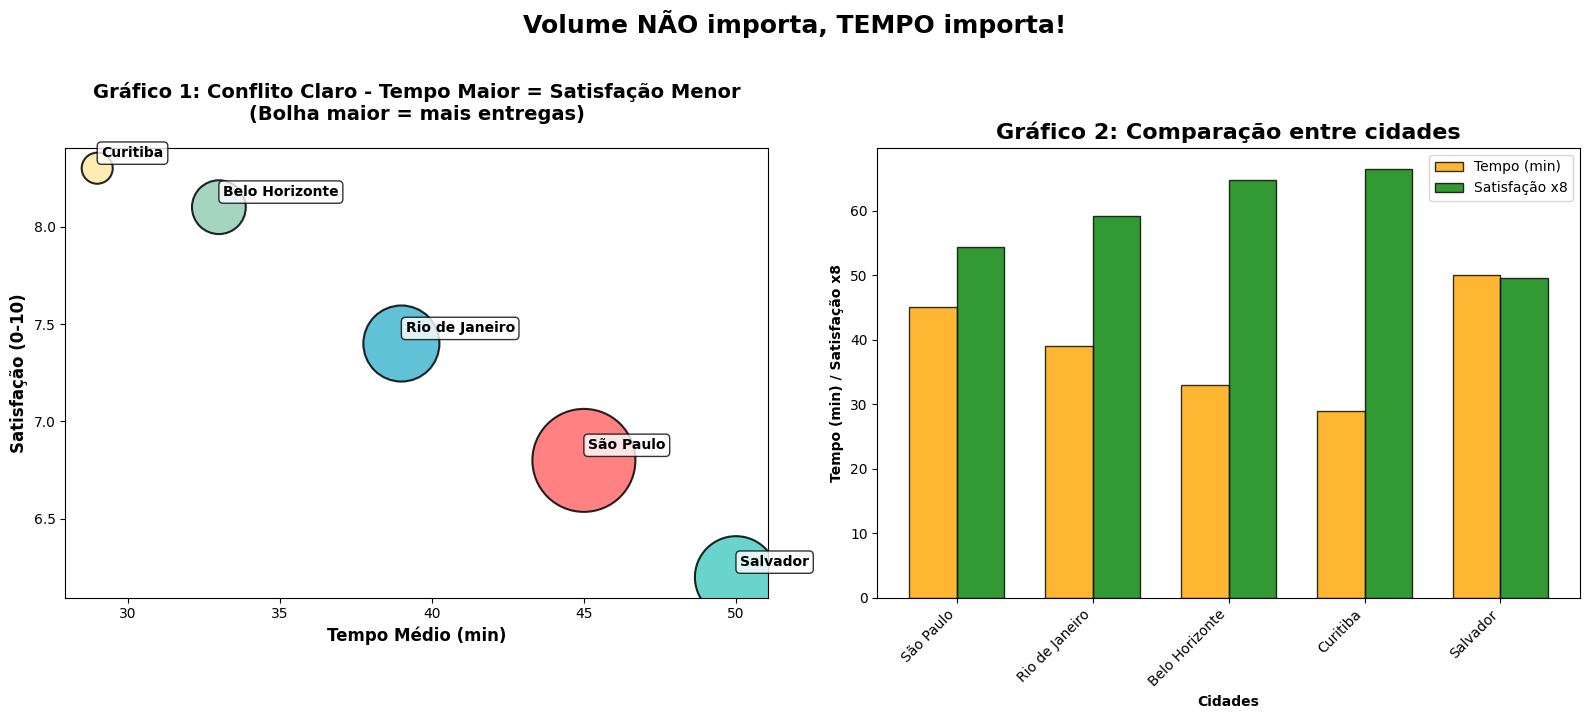

graficos_unificados.png salvo

INSIGHTS:
- SP: MAIS entregas (1200) + TEMPO alto (45min) = Baixa satisfação
- Curitiba: MENOS entregas (700) + TEMPO baixo (29min) = TOP satisfação
- Salvador: TEMPO péssimo (50min) pior insatisfação independente do volume


In [4]:
plt.style.use('default')
sns.set_palette("husl")

# Base de dados única
data = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Entregas': [1200, 1000, 950, 800, 700],
    'Tempo_min': [45, 50, 39, 33, 29],
    'Satisfacao': [6.8, 6.2, 7.4, 8.1, 8.3]
}
df = pd.DataFrame(data)

# ---------- FIGURA COM 2 GRÁFICOS LADO A LADO ----------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ==================== GRÁFICO 1: BOLHAS ====================
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Escala melhor para tamanho das bolhas (min-max)
s_bolha = ((df['Entregas'] - df['Entregas'].min()) /
           (df['Entregas'].max() - df['Entregas'].min()) * 5000 + 500).tolist()

ax1.scatter(df['Tempo_min'], df['Satisfacao'], s=s_bolha, alpha=0.85,
            c=colors, edgecolors='black', linewidth=1.5)

for i, cidade in enumerate(df['Cidade']):
    ax1.annotate(cidade, (df['Tempo_min'][i], df['Satisfacao'][i]),
                 xytext=(3, 8), textcoords='offset points', fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

ax1.set_xlabel('Tempo Médio (min)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Satisfação (0-10)', fontweight='bold', fontsize=12)
ax1.set_title('Gráfico 1: Conflito Claro - Tempo Maior = Satisfação Menor\n(Bolha maior = mais entregas)',
              fontweight='bold', fontsize=14, pad=20)


# ==================== GRÁFICO 2: BARRAS ====================
# Reordena o df para o padrão desejado no gráfico 2
ordem_barras = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador']
df_bar = df.set_index('Cidade').loc[ordem_barras].reset_index()

x = range(len(df_bar))
width = 0.35

ax2.bar([i - width/2 for i in x], df_bar['Tempo_min'], width, label='Tempo (min)',
        alpha=0.8, color='orange', edgecolor='black')
ax2.bar([i + width/2 for i in x], df_bar['Satisfacao']*8, width, label='Satisfação x8',
        alpha=0.8, color='green', edgecolor='black')

ax2.set_xlabel('Cidades', fontweight='bold')
ax2.set_ylabel('Tempo (min) / Satisfação x8', fontweight='bold')
ax2.set_title('Gráfico 2: Comparação entre cidades', fontweight='bold', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(df_bar['Cidade'], rotation=45, ha='right')
ax2.legend()


# ==================== TÍTULO GERAL E SALVAMENTO ====================
plt.suptitle('Volume NÃO importa, TEMPO importa!', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('graficos_unificados.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

print("graficos_unificados.png salvo")
print("\nINSIGHTS:")
print("- SP: MAIS entregas (1200) + TEMPO alto (45min) = Baixa satisfação")
print("- Curitiba: MENOS entregas (700) + TEMPO baixo (29min) = TOP satisfação")
print("- Salvador: TEMPO péssimo (50min) pior insatisfação independente do volume")


#GRÁFICO SCARTTER PLOT - Conflito Claro - Tempo Maior = Satisfação Menor

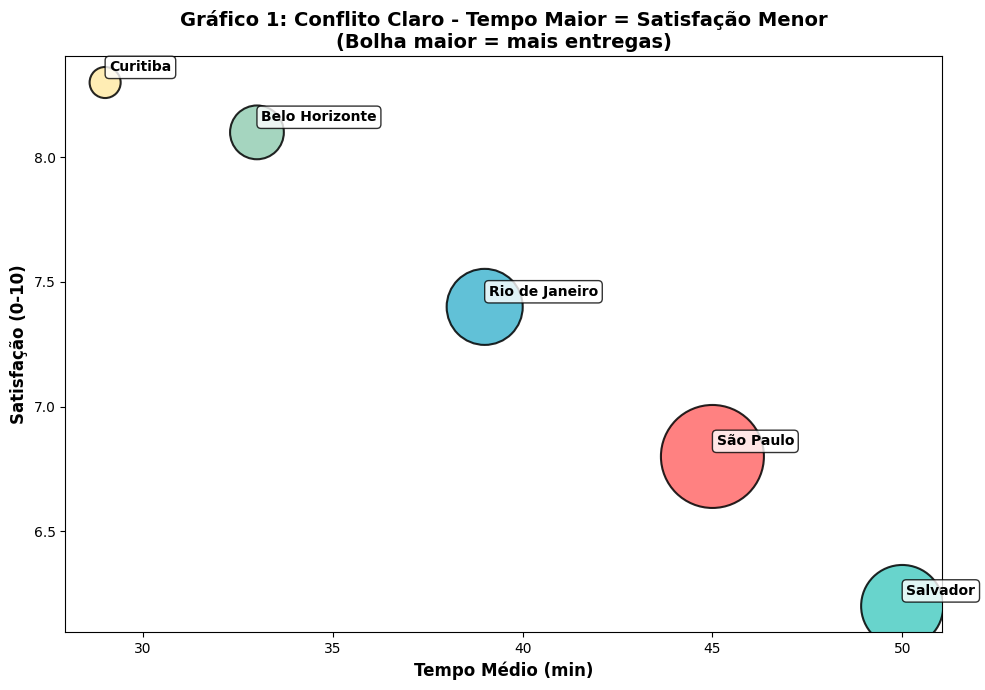

In [5]:
plt.style.use('default')
sns.set_palette("husl")

data = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Entregas': [1200, 1000, 950, 800, 700],
    'Tempo_min': [45, 50, 39, 33, 29],
    'Satisfacao': [6.8, 6.2, 7.4, 8.1, 8.3]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
s_bolha = ((df['Entregas'] - df['Entregas'].min()) / (df['Entregas'].max() - df['Entregas'].min()) * 5000 + 500).tolist()
ax.scatter(df['Tempo_min'], df['Satisfacao'], s=s_bolha, alpha=0.85,
           c=colors, edgecolors='black', linewidth=1.5)
for i, cidade in enumerate(df['Cidade']):
    ax.annotate(cidade, (df['Tempo_min'][i], df['Satisfacao'][i]),
                xytext=(3, 8), textcoords='offset points', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
ax.set_xlabel('Tempo Médio (min)', fontweight='bold', fontsize=12)
ax.set_ylabel('Satisfação (0-10)', fontweight='bold', fontsize=12)
ax.set_title('Gráfico 1: Conflito Claro - Tempo Maior = Satisfação Menor\n(Bolha maior = mais entregas)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('grafico1.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()




#GRÁFICO DE COLUNAS - COMPARAÇÃO POR CIDADES

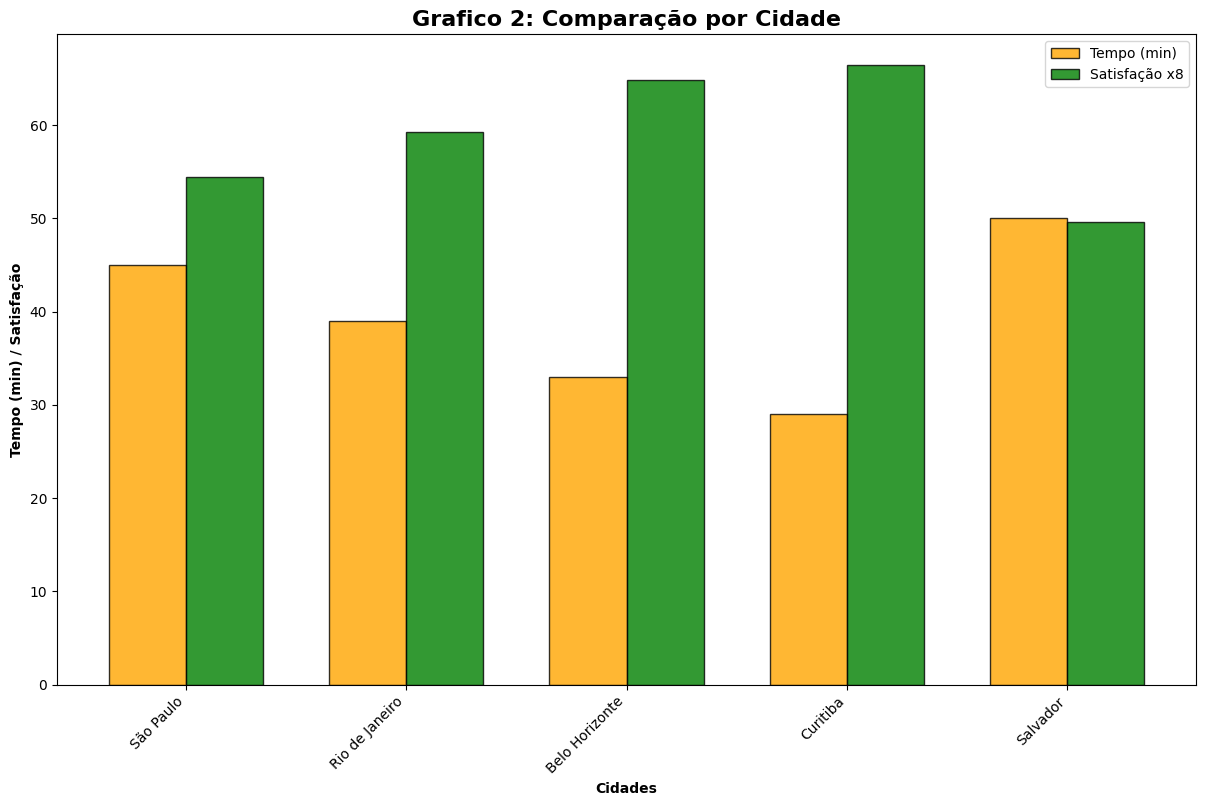

In [6]:
plt.style.use('default')
sns.set_palette("husl")

data = {
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba', 'Salvador'],
    'Tempo_min': [45, 39, 33, 29, 50],
    'Satisfacao': [6.8, 7.4, 8.1, 8.3, 6.2],
    'Entregas': [1200, 950, 800, 700, 1000]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
x = range(len(df))
width = 0.35
ax.bar([i - width/2 for i in x], df['Tempo_min'], width, label='Tempo (min)',
       alpha=0.8, color='orange', edgecolor='black')
ax.bar([i + width/2 for i in x], df['Satisfacao']*8, width, label='Satisfação x8',
       alpha=0.8, color='green', edgecolor='black')
ax.set_xlabel('Cidades', fontweight='bold')
ax.set_ylabel('Tempo (min) / Satisfação', fontweight='bold')
ax.set_title('Grafico 2: Comparação por Cidade', fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(df['Cidade'], rotation=45, ha='right')
ax.legend()
plt.tight_layout(pad=0.5)
plt.savefig('grafico2.png', dpi=400, bbox_inches='tight', pad_inches=0, facecolor='white')
plt.show()


#GRÁFICOS DE COMPARAÇÃO - O QUE REALMENTE IMPORTA?

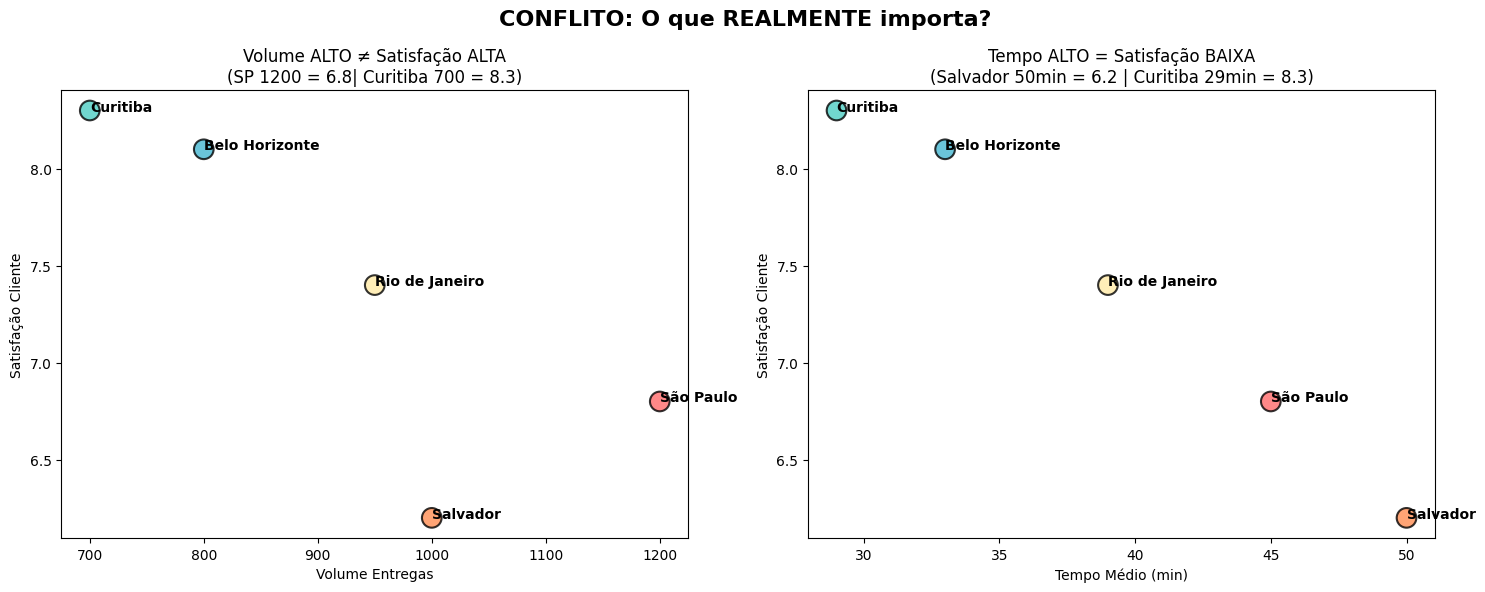

In [7]:
plt.style.use('default')
sns.set_palette("husl")

dados = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Entregas_mes': [1200, 1000, 950, 800, 700],
    'Tempo_medio_min': [45, 50, 39, 33, 29],
    'Satisfacao_clientes': [6.8, 6.2, 7.4, 8.1, 8.3]
}
df = pd.DataFrame(dados)

# Mapa de cores por cidade (insatisfeitas vermelho/laranja → positivas azul/verde)
color_map = {
    'São Paulo': '#FF6B6B',      # Vermelho (6.8 baixa)
    'Salvador': '#FF8E53',       # Laranja (6.2 pior)
    'Rio de Janeiro': '#FFEAA7', # Amarelo neutro (7.4)
    'Belo Horizonte': '#45B7D1', # Azul positiva (8.1)
    'Curitiba': '#4ECDC4'        # Verde top (8.3)
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. VOLUME x SATISFAÇÃO (cores por cidade)
ax1.scatter(df['Entregas_mes'], df['Satisfacao_clientes'],
            s=200, alpha=0.8, c=df['Cidade'].map(color_map),
            edgecolors='black', linewidth=1.5)
for i, cidade in enumerate(df['Cidade']):
    ax1.annotate(cidade, (df['Entregas_mes'][i], df['Satisfacao_clientes'][i]),
                 fontweight='bold', fontsize=10)
ax1.set_xlabel('Volume Entregas')
ax1.set_ylabel('Satisfação Cliente')
ax1.set_title('Volume ALTO ≠ Satisfação ALTA\n(SP 1200 = 6.8| Curitiba 700 = 8.3)')


# 2. TEMPO x SATISFAÇÃO (mesmas cores)
ax2.scatter(df['Tempo_medio_min'], df['Satisfacao_clientes'],
            s=200, alpha=0.8, c=df['Cidade'].map(color_map),
            edgecolors='black', linewidth=1.5)
for i, cidade in enumerate(df['Cidade']):
    ax2.annotate(cidade, (df['Tempo_medio_min'][i], df['Satisfacao_clientes'][i]),
                 fontweight='bold', fontsize=10)
ax2.set_xlabel('Tempo Médio (min)')
ax2.set_ylabel('Satisfação Cliente')
ax2.set_title('Tempo ALTO = Satisfação BAIXA\n(Salvador 50min = 6.2 | Curitiba 29min = 8.3)')


plt.suptitle('CONFLITO: O que REALMENTE importa?', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('conflito_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

#GRÁFICO SCATTERPLOT - Volume ALTO ≠ Satisfação ALTA

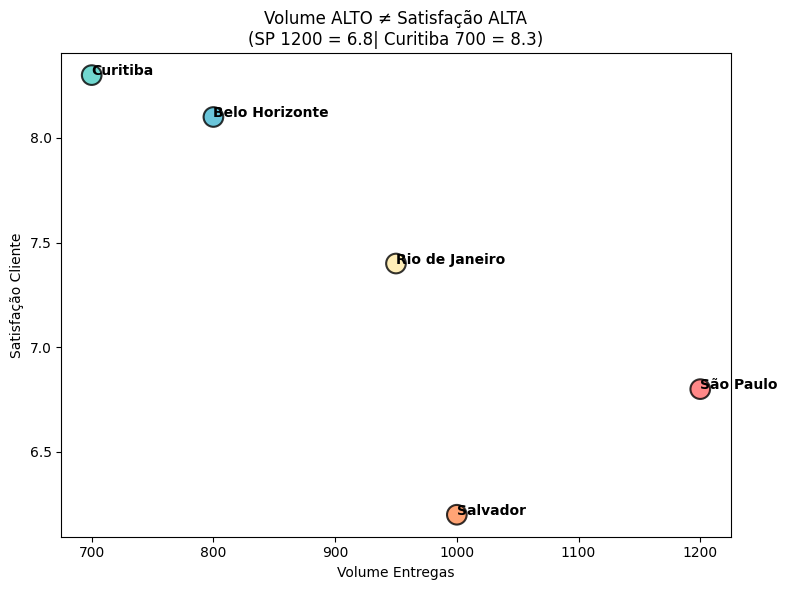

In [8]:
plt.style.use('default')
sns.set_palette("husl")

dados = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Entregas_mes': [1200, 1000, 950, 800, 700],
    'Satisfacao_clientes': [6.8, 6.2, 7.4, 8.1, 8.3]
}
df = pd.DataFrame(dados)

color_map = {
    'São Paulo': '#FF6B6B',      # Vermelho (baixa)
    'Salvador': '#FF8E53',       # Laranja (pior)
    'Rio de Janeiro': '#FFEAA7', # Amarelo
    'Belo Horizonte': '#45B7D1', # Azul
    'Curitiba': '#4ECDC4'        # Verde (top)
}

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df['Entregas_mes'], df['Satisfacao_clientes'],
           s=200, alpha=0.8, c=df['Cidade'].map(color_map),
           edgecolors='black', linewidth=1.5)
for i, cidade in enumerate(df['Cidade']):
    ax.annotate(cidade, (df['Entregas_mes'][i], df['Satisfacao_clientes'][i]),
                fontweight='bold', fontsize=10)
ax.set_xlabel('Volume Entregas')
ax.set_ylabel('Satisfação Cliente')
ax.set_title('Volume ALTO ≠ Satisfação ALTA\n(SP 1200 = 6.8| Curitiba 700 = 8.3)')

plt.tight_layout()
plt.savefig('volume_satisfacao.png', dpi=300, bbox_inches='tight')
plt.show()


#GRÁFICO SCATTER PLOT - Tempo ALTO = Satisfação BAIXA

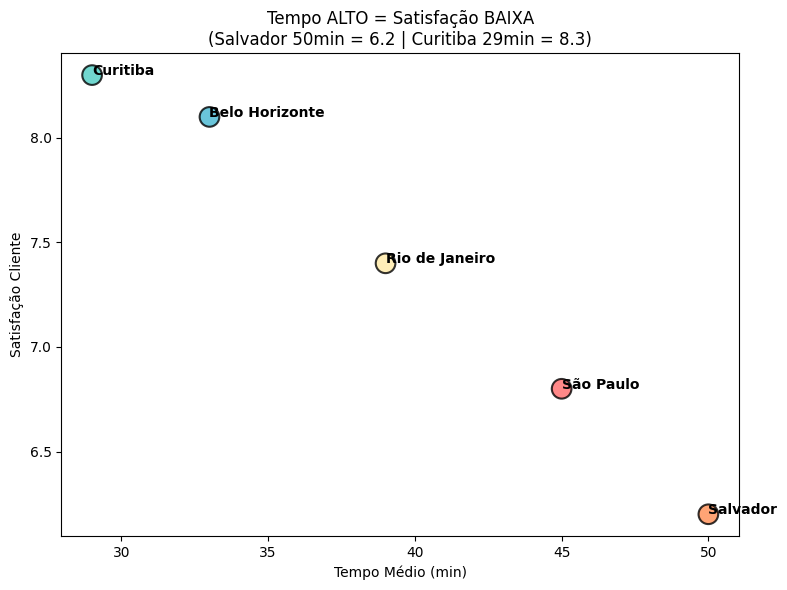

In [9]:
plt.style.use('default')
sns.set_palette("husl")

dados = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Tempo_medio_min': [45, 50, 39, 33, 29],
    'Satisfacao_clientes': [6.8, 6.2, 7.4, 8.1, 8.3]
}
df = pd.DataFrame(dados)

color_map = {
    'São Paulo': '#FF6B6B',      # Vermelho (baixa)
    'Salvador': '#FF8E53',       # Laranja (pior)
    'Rio de Janeiro': '#FFEAA7', # Amarelo
    'Belo Horizonte': '#45B7D1', # Azul
    'Curitiba': '#4ECDC4'        # Verde (top)
}

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(df['Tempo_medio_min'], df['Satisfacao_clientes'],
           s=200, alpha=0.8, c=df['Cidade'].map(color_map),
           edgecolors='black', linewidth=1.5)
for i, cidade in enumerate(df['Cidade']):
    ax.annotate(cidade, (df['Tempo_medio_min'][i], df['Satisfacao_clientes'][i]),
                fontweight='bold', fontsize=10)
ax.set_xlabel('Tempo Médio (min)')
ax.set_ylabel('Satisfação Cliente')
ax.set_title('Tempo ALTO = Satisfação BAIXA\n(Salvador 50min = 6.2 | Curitiba 29min = 8.3)')

plt.tight_layout()
plt.savefig('tempo_satisfacao.png', dpi=300, bbox_inches='tight')
plt.show()


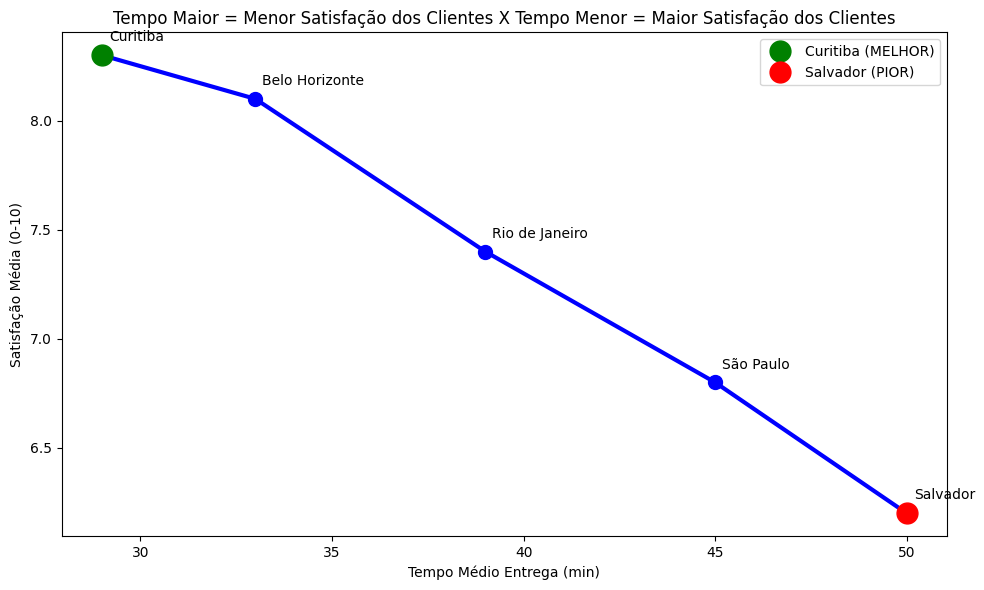

In [10]:
data = {
    'Cidade': ['Curitiba', 'Belo Horizonte', 'Rio de Janeiro', 'São Paulo', 'Salvador'],
    'Tempo_min': [29, 33, 39, 45, 50],
    'Satisfacao': [8.3, 8.1, 7.4, 6.8, 6.2]
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

# Linha principal
ax.plot(df['Tempo_min'], df['Satisfacao'], marker='o', linewidth=3, markersize=10, color='blue')

# Curitiba (verde) e Salvador (vermelho)
ax.plot(29, 8.3, 'o', color='green', markersize=15, label='Curitiba (MELHOR)')
ax.plot(50, 6.2, 'o', color='red', markersize=15, label='Salvador (PIOR)')

# Labels
for i in range(len(df)):
    ax.annotate(df['Cidade'][i], (df['Tempo_min'][i], df['Satisfacao'][i]),
                xytext=(5, 10), textcoords='offset points', fontsize=10)

ax.set_xlabel('Tempo Médio Entrega (min)')
ax.set_ylabel('Satisfação Média (0-10)')
ax.set_title('Tempo Maior = Menor Satisfação dos Clientes X Tempo Menor = Maior Satisfação dos Clientes')
ax.legend()
ax.set_facecolor('white')  # Fundo branco puro
fig.patch.set_facecolor('white')  # Figura sem cinza
plt.tight_layout()
plt.savefig('graficodelinha.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

#GRÁFICO DE COLUNAS - Tempo + Satisfação + Entregas

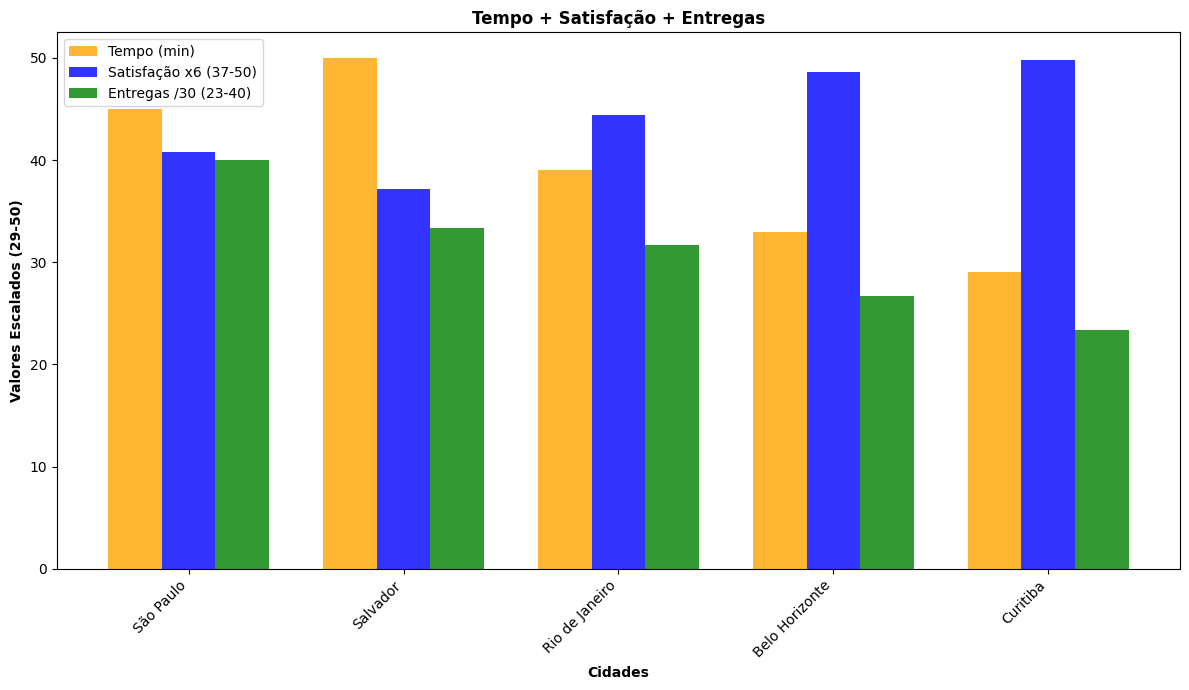

In [11]:
data = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Tempo_min': [45, 50, 39, 33, 29],
    'Satisfacao': [6.8, 6.2, 7.4, 8.1, 8.3],
    'Entregas': [1200, 1000, 950, 800, 700]
}
df = pd.DataFrame(data)

x = np.arange(len(df))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))


ax.bar(x - width, df['Tempo_min'], width, label='Tempo (min)', color='orange', alpha=0.8)
ax.bar(x, df['Satisfacao']*6, width, label='Satisfação x6 (37-50)', color='blue', alpha=0.8)  # x6 = 37-50
ax.bar(x + width, df['Entregas']/30, width, label='Entregas /30 (23-40)', color='green', alpha=0.8)  # /30 = 23-40

ax.set_xlabel('Cidades', fontweight='bold')
ax.set_ylabel('Valores Escalados (29-50)', fontweight='bold')
ax.set_title('Tempo + Satisfação + Entregas', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['Cidade'], rotation=45, ha='right')
ax.legend()
ax.grid(False)
plt.tight_layout()
plt.savefig('3_variaveis_equilibradas.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


#MAPA INTERATIVO

In [12]:
import pandas as pd
import plotly.express as px

# Dados EXATOS na sequência pedida
data = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'lat': [-23.55, -12.97, -22.91, -19.92, -25.43],
    'lon': [-46.64, -38.51, -43.17, -43.94, -49.27],
    'Satisfacao': [6.8, 6.2, 7.4, 8.1, 8.3],
    'Tempo_min': [45, 50, 39, 33, 29],
    'Entregas': [1200, 1000, 950, 800, 700]
}
df = pd.DataFrame(data)

# Mapa scatter com bolhas (tamanho=entregas, cor=satisfação)
fig = px.scatter_geo(df, lat='lat', lon='lon',
                     size='Entregas', color='Satisfacao',
                     hover_name='Cidade',
                     hover_data=['Tempo_min', 'Entregas'],
                     title='Mapa Brasil: Satisfação Cliente Delivery<br>Bolha grande=mais entregas | Verde=alta satisfação',
                     size_max=40, color_continuous_scale='RdYlGn',
                     projection='natural earth')

fig.update_geos(center={'lat': -14, 'lon': -52},  # Centro Brasil
                resolution=50, showcountries=True, countrycolor="Black",
                showsubunits=True, subunitcolor="Blue")
fig.show()
fig.write_html('mapa_brasil.html')  # Salva interativo


In [13]:
dados = {
    'Cidade': ['São Paulo', 'Salvador', 'Rio de Janeiro', 'Belo Horizonte', 'Curitiba'],
    'Tempo_medio_min': [45, 50, 39, 33, 29],
    'Satisfacao_clientes': [6.8, 6.2, 7.4, 8.1, 8.3],
    'Entregas_mes': [1200, 1000, 950, 800, 700]
}
df = pd.DataFrame(dados)
df['Satisfacao_clientes'] = df['Satisfacao_clientes'].round(1)
df.to_csv('tabela_delivery.csv', index=False)  # Baixe aqui
print("✅ tabela_delivery.csv salvo!")
print(df.to_string(index=False))



✅ tabela_delivery.csv salvo!
        Cidade  Tempo_medio_min  Satisfacao_clientes  Entregas_mes
     São Paulo               45                  6.8          1200
      Salvador               50                  6.2          1000
Rio de Janeiro               39                  7.4           950
Belo Horizonte               33                  8.1           800
      Curitiba               29                  8.3           700
